## Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [3]:
# Importing the dataset
RideShare = pd.read_csv(
    "Dataset/Ride Sharing Data.csv",
    parse_dates= ["Ride DateTime"]
)

## Dataset Overview

In [4]:
RideShare

,Ride ID,User ID,Driver ID,Ride DateTime,Pickup Location,Dropoff Location,Distance(km),Ride Duration(min),Fare Amount,Payment Method,Ride Status,User Rating,Driver Rating,Surge Pricing,Promo Code Used,Vehicle Type,Weather Condition,Traffic Level,Driver Experience Years,User Type
0,R000001,U8270,D464,2024-04-01 17:18:00,Financial District,Midtown,30.86,85,96.59,Mobile Wallet,Completed,4.9,4.9,Yes,Yes,SUV,Clear,Low,1,Frequent
1,R000002,U1860,D676,2024-02-01 11:24:00,Mall,Financial District,19.24,60,75.84,Credit Card,Completed,3.3,3.9,No,Yes,Sedan,Rainy,Medium,7,New
2,R000003,U6390,D425,2024-07-01 00:38:00,Suburbs,University,2.27,9,11.16,Credit Card,Completed,4.5,3.7,No,Yes,Motorcycle,Clear,High,1,New
3,R000004,U6191,D680,2024-07-01 16:19:00,Suburbs,Airport,22.87,55,77.68,Cash,Completed,3.3,4.9,No,No,SUV,Foggy,Low,6,Returning
4,R000005,U6734,D732,2024-02-01 21:27:00,Midtown,Downtown,18.59,42,66.59,Cash,No-show,2.8,2.6,No,No,Sedan,Clear,Low,9,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R009996,U1581,D369,2024-01-01 16:51:00,Financial District,Downtown,30.49,86,97.27,Credit Card,Completed,4.2,4.3,Yes,No,Sedan,Clear,Low,9,New
9996,R009997,U4881,D494,2024-06-01 13:13:00,Midtown,Airport,33.97,92,98.23,Cash,Completed,4.0,3.6,No,No,Sedan,Clear,Low,8,Returning
9997,R009998,U4909,D954,2024-02-01 20:07:00,Suburbs,Midtown,3.89,8,20.28,Cash,Completed,3.9,4.3,No,No,Electric,Clear,High,10,Returning
9998,R009999,U2999,D261,2024-01-01 23:59:00,University,Airport,27.42,71,89.08,Credit Card,Completed,3.7,4.0,No,No,Electric,Clear,Medium,9,New


In [5]:
# Columns names and their data types 
RideShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Ride ID                  10000 non-null  object        
 1   User ID                  10000 non-null  object        
 2   Driver ID                10000 non-null  object        
 3   Ride DateTime            10000 non-null  datetime64[ns]
 4   Pickup Location          10000 non-null  object        
 5   Dropoff Location         10000 non-null  object        
 6   Distance(km)             10000 non-null  float64       
 7   Ride Duration(min)       10000 non-null  int64         
 8   Fare Amount              10000 non-null  float64       
 9   Payment Method           10000 non-null  object        
 10  Ride Status              10000 non-null  object        
 11  User Rating              10000 non-null  float64       
 12  Driver Rating            10000 no

In [6]:
# Description of the numerical features in the dataset
RideShare.describe().round(2)

,Ride DateTime,Distance(km),Ride Duration(min),Fare Amount,User Rating,Driver Rating,Driver Experience Years
count,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2024-03-31 18:25:44.400000,17.99,54.03,60.09,3.73,3.73,5.51
min,2024-01-01 00:00:00,1.00,2.00,4.91,1.00,1.00,1.00
25%,2024-02-01 17:39:45,9.65,28.00,34.71,3.30,3.30,3.00
50%,2024-04-01 11:19:30,18.09,52.00,59.86,3.80,3.80,6.00
75%,2024-06-01 04:59:15,26.40,77.00,84.59,4.40,4.40,8.00
max,2024-07-01 22:39:00,35.00,139.00,128.75,5.00,5.00,10.00
std,NaN,9.77,31.65,30.12,0.87,0.87,2.86


In [7]:
# Checking for missing values
RideShare.isnull().sum()

Ride ID                    0
User ID                    0
Driver ID                  0
Ride DateTime              0
Pickup Location            0
Dropoff Location           0
Distance(km)               0
Ride Duration(min)         0
Fare Amount                0
Payment Method             0
Ride Status                0
User Rating                0
Driver Rating              0
Surge Pricing              0
Promo Code Used            0
Vehicle Type               0
Weather Condition          0
Traffic Level              0
Driver Experience Years    0
User Type                  0
dtype: int64

In [8]:
# Dropping duplicate rows
RideShare.drop_duplicates(inplace=True)

## Key Metrics

In [9]:
# Total Revenue (Sum of Fare Amount)
TotalRevenue = RideShare["Fare Amount"].sum().round(2)
print("The total revenue is:",TotalRevenue)

The total revenue is: 600938.35


In [10]:
# Average Customer Rating
AvgCustomerRating = RideShare["User Rating"].mean().round(2)
print("The average customer rating is:", AvgCustomerRating)

The average customer rating is: 3.73


In [11]:
# Average Ride Duration (min)
AvgRideDuration = RideShare["Ride Duration(min)"].mean().round(2)
print("The average ride duration is:", AvgRideDuration, "minutes")

The average ride duration is: 54.03 minutes


In [12]:
# No-Show Rate (%)
NoShowRate = (RideShare["Ride Status"]=="No-show").mean().round(2)*100
print("The no-show rate is:", NoShowRate, "%")

The no-show rate is: 5.0 %


In [13]:
# Total Rides Completed
TotalRidesCompleed = (RideShare["Ride Status"]=="Completed").sum()
print("The total rides completed is:", TotalRidesCompleed)

The total rides completed is: 8495


## Exploratory Data Analysis

### Customer Behavior & Preferences

In [14]:
# What are the most popular pickup and drop-off locations?
PopularPickupSpots = RideShare["Pickup Location"].value_counts().head(3)
PopularDropoffSpots = RideShare["Dropoff Location"].value_counts().head(3)
print("The most popular pickup locations are:\n", PopularPickupSpots)
print("\nThe most popular drop-off locations are:\n", PopularDropoffSpots)

The most popular pickup locations are:
 Pickup Location
Suburbs    1487
Mall       1459
Midtown    1425
Name: count, dtype: int64

The most popular drop-off locations are:
 Dropoff Location
Financial District    1552
Mall                  1446
Airport               1437
Name: count, dtype: int64


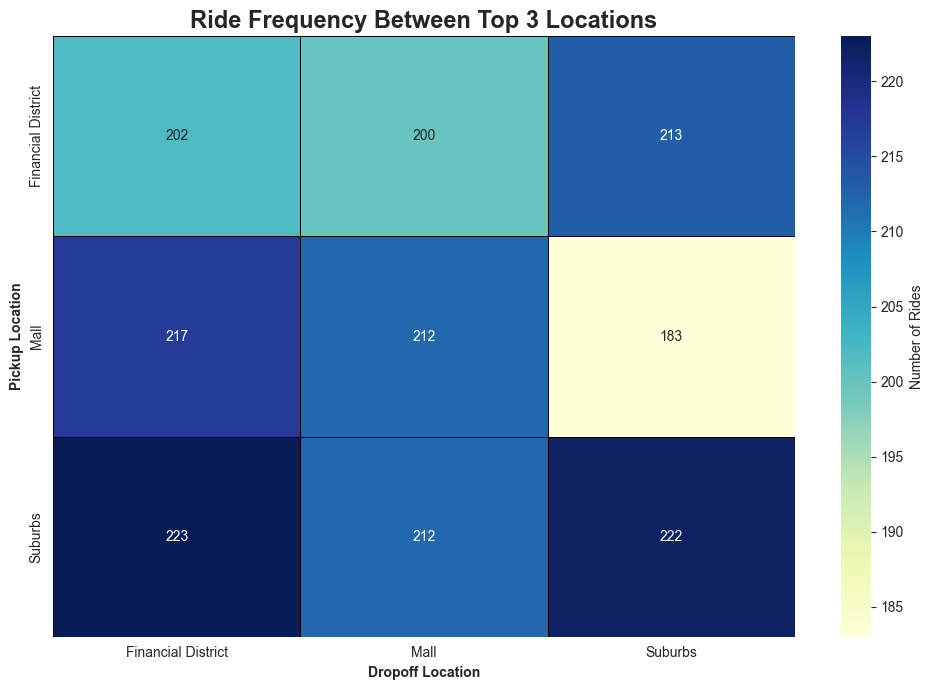

In [15]:
# Using heatmap to show the Top Pickup & Drop-Off Locations

# 1. Create the Route Frequency Matrix (Co-occurrence Table)
# This groups by the pair of locations and counts the frequency.
RouteMatrix = (
    RideShare.groupby(["Pickup Location", "Dropoff Location"])
    .size()
    .unstack(fill_value=0) # Pivots Dropoff Location to columns, filling missing routes with 0
)

# 2. Identify and Filter for the Top 3 Locations
# This keeps the heatmap focused on the highest-demand areas for better readability.
Top3Locs = (
    pd.concat([RideShare["Pickup Location"], RideShare["Dropoff Location"]])
    .value_counts()
    .head(3)
    .index
)

# Filter the matrix to only include the top 3 locations on both axes
TopRoutes = RouteMatrix.loc[RouteMatrix.index.intersection(Top3Locs), RouteMatrix.columns.intersection(Top3Locs)]

# 3. Generate the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    TopRoutes, 
    annot=True, 
    fmt="d",
    cmap="YlGnBu", 
    linewidths=.5, 
    linecolor="black",
    cbar_kws={"label": "Number of Rides"}
)
plt.title("Ride Frequency Between Top 3 Locations", fontsize=17, fontweight="bold")
plt.ylabel("Pickup Location", fontweight="bold")
plt.xlabel("Dropoff Location", fontweight="bold")
plt.tight_layout()
plt.show()

In [16]:
# Extracting the day of the week from the Ride DateTime Column
RideShare["Day of Week"] = RideShare["Ride DateTime"].dt.day_name()

# How do weekends vs. weekdays impact ride demand?
WeekdayRides = RideShare[RideShare["Day of Week"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])]
WeekendRides = RideShare[RideShare["Day of Week"].isin(["Saturday", "Sunday"])]

# Analyzing the number of rides
print("Weekday Rides:", WeekdayRides.shape[0])
print("Weekend Rides:", WeekendRides.shape[0])

Weekday Rides: 8560
Weekend Rides: 1440


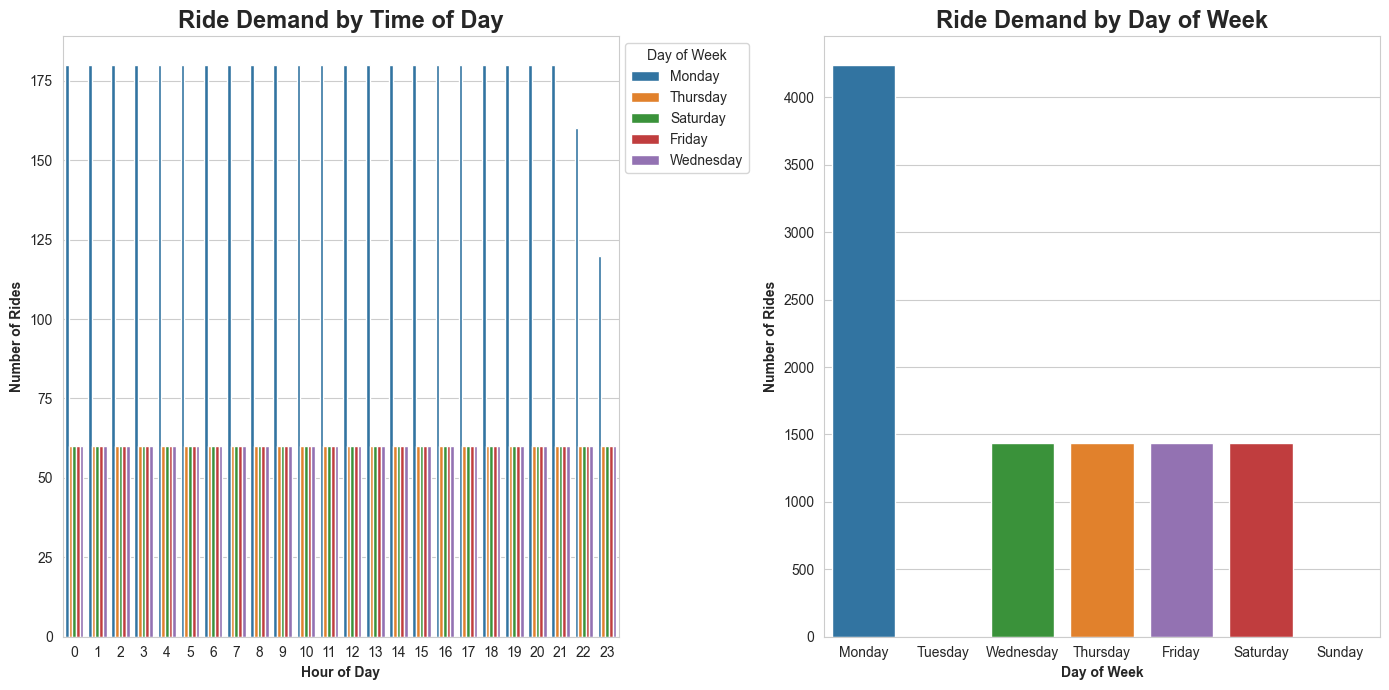

In [17]:
# Ride Demand by Time of Day & Day of Week (Bar Chart)
plt.figure(figsize=(14, 7))

# Subplot 1: Ride Demand by Time of Day
plt.subplot(1, 2, 1)
RideShare["Hour"] = RideShare["Ride DateTime"].dt.hour
sns.countplot(data=RideShare, x="Hour", hue="Day of Week", order=range(24))
plt.title("Ride Demand by Time of Day", fontsize=17, fontweight="bold")
plt.xlabel("Hour of Day", fontweight="bold")
plt.ylabel("Number of Rides", fontweight="bold")
plt.legend(title="Day of Week", bbox_to_anchor=(1, 1), loc="upper left")

# Subplot 2: Ride Demand by Day of Week
plt.subplot(1, 2, 2)
sns.countplot(data=RideShare, x="Day of Week", hue="Day of Week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Ride Demand by Day of Week", fontsize=17, fontweight="bold")
plt.xlabel("Day of Week", fontweight="bold")
plt.ylabel("Number of Rides", fontweight="bold")

plt.tight_layout()
plt.show()

In [18]:
# Which vehicle types (SUV, Sedan, Motorcycle, Electric) are most preferred?
VehiclePreference = RideShare["Vehicle Type"].value_counts()
print("Vehicle type preference:\n", VehiclePreference)

Vehicle type preference:
 Vehicle Type
Sedan         3964
SUV           3049
Shared        1032
Motorcycle     984
Electric       971
Name: count, dtype: int64


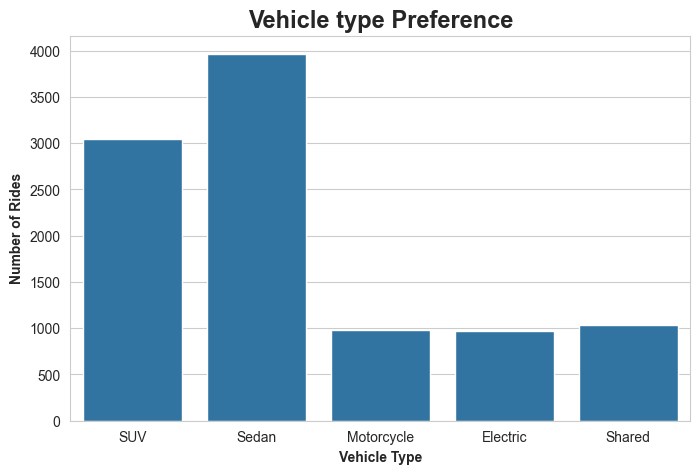

In [19]:
# Using bar chart to show vehicle type preference
plt.figure(figsize=(8,5))
sns.countplot(
    data=RideShare,
    x="Vehicle Type"
)
plt.title("Vehicle type Preference", fontsize=17, fontweight="bold")
plt.xlabel("Vehicle Type", fontweight="bold")
plt.ylabel("Number of Rides", fontweight="bold")

plt.show()

### Driver Performance & Efficiency

In [20]:
#  Which drivers have the highest and lowest ratings?
DriverRatings = RideShare.groupby("Driver ID")["Driver Rating"].mean().round(2)

Top5Drivers = DriverRatings.sort_values(ascending=False).head(5)

# Bottom 5 Drivers with lowest ratings
Bottom5Drivers = DriverRatings.sort_values(ascending=True).head(5)

print("Top 5 Drivers:\n", Top5Drivers)
print("Bottom 5 Drivers:\n", Bottom5Drivers)

Top 5 Drivers:
 Driver ID
D547    4.75
D171    4.54
D785    4.51
D439    4.50
D766    4.47
Name: Driver Rating, dtype: float64
Bottom 5 Drivers:
 Driver ID
D780    2.67
D781    2.68
D811    2.81
D814    2.83
D212    2.96
Name: Driver Rating, dtype: float64


In [21]:
# How does driver experience impact ride completion rates and customer ratings?

# Base Aggregation
DriverExperience = RideShare.groupby("Driver ID").agg(
    TotalRides=("Ride Status", "count"),
    CompletedRides=("Ride Status", lambda x: (x == "Completed").sum()),
    AvgCustomerRating=("User Rating", "mean")
).round(2)

# Add the key performance metric (Completion Rate)
DriverExperience["Completion Rate"] = (
    DriverExperience["CompletedRides"] / DriverExperience["TotalRides"]
).round(3) 

# Define the Tiers (Adjusted for max rides = 15)
bins = [0, 5, 10, 16] 
labels = ['Low Experience', 'Medium Experience', 'High Experience']

DriverExperience["Experience Tier"] = pd.cut(
    DriverExperience["TotalRides"], 
    bins=bins, 
    labels=labels, 
    right=True
)

# Convert the 'Driver ID' index back into a column
DriverExperience = DriverExperience.reset_index()

# Analyze Impact (Group by the new tier)
ExperienceImpact = DriverExperience.groupby("Experience Tier").agg(
    DriverCount=("Driver ID", "count"),
    AvgCompletionRate=("Completion Rate", "mean"),
    AvgUserRating=("AvgCustomerRating", "mean")
).round(3)

print("--- Driver Experience Impact Summary ---")
print(ExperienceImpact.to_markdown(index=True))

--- Driver Experience Impact Summary ---
| Experience Tier   |   DriverCount |   AvgCompletionRate |   AvgUserRating |
|:------------------|--------------:|--------------------:|----------------:|
| Low Experience    |            24 |               0.874 |           3.861 |
| Medium Experience |           379 |               0.857 |           3.763 |
| High Experience   |           449 |               0.846 |           3.721 |


C:\Users\USER\AppData\Local\Temp\ipykernel_9560\1936980057.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ExperienceImpact = DriverExperience.groupby("Experience Tier").agg(


In [22]:
# What is the average ride duration per driver, and how does it vary by traffic?
AvgRideDurationByTraffic = RideShare.groupby("Traffic Level")["Ride Duration(min)"].mean().round(2)
AvgRideDurationByTraffic

Traffic Level
High      53.11
Low       54.59
Medium    54.07
Name: Ride Duration(min), dtype: float64

### Operational & Financial Insights

In [24]:
# What is the average fare amount per ride type?
AvgFareByRideType = RideShare.groupby("Vehicle Type")["Fare Amount"].mean().round(2)
AvgFareByRideType

Vehicle Type
Electric      61.18
Motorcycle    59.84
SUV           59.88
Sedan         60.05
Shared        60.11
Name: Fare Amount, dtype: float64

In [27]:
# How does surge pricing affect ride fare and total revenue?
SurgeImpact = RideShare.groupby("Surge Pricing").agg(
    AvgFare=("Fare Amount", "mean"),
    TotalRevenue=("Fare Amount", "sum"),
    RideCount=("Fare Amount", "count")
).round(2)

SurgeImpact

,AvgFare,TotalRevenue,RideCount
Surge Pricing,,,
No,60.00,480566.48,8009
Yes,60.46,120371.87,1991


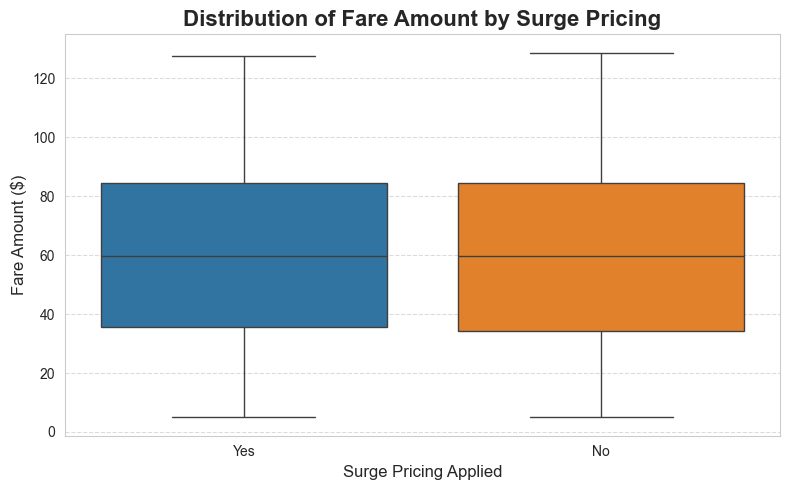

In [31]:
# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=RideShare, 
    x="Surge Pricing", 
    y="Fare Amount", 
    hue="Surge Pricing"
)

# Add titles and labels
plt.title("Distribution of Fare Amount by Surge Pricing", fontsize=16, fontweight='bold')
plt.xlabel("Surge Pricing Applied", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)

# Enhance the visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# Which payment methods are most commonly used?
PaymentMethodCounts = RideShare["Payment Method"].value_counts(normalize=True)
PaymentMethodCounts

Payment Method
Credit Card      0.4946
Cash             0.3028
Mobile Wallet    0.2026
Name: proportion, dtype: float64

### External Factors Impacting Rides

In [37]:
# How does weather condition (Rainy, Snowy, Foggy) impact ride duration and customer ratings?
WeatherImpact = RideShare.groupby("Weather Condition").agg(
    AvgDuration=("Ride Duration(min)", "mean"),
    AvgRating=("User Rating", "mean"),
    RideCount=("Ride ID", "count")
).round(2)

WeatherImpact

,AvgDuration,AvgRating,RideCount
Weather Condition,,,
Clear,54.17,3.74,6042
Foggy,53.49,3.70,1004
Rainy,53.72,3.76,1985
Snowy,52.84,3.73,497
Thunderstorm,55.94,3.66,472


In [38]:
# What is the effect of traffic level (Low, Medium, High) on ride duration and fare amounts?
TrafficImpact = RideShare.groupby("Traffic Level").agg(
    AvgDuration=("Ride Duration(min)", "mean"),
    AvgFare=("Fare Amount", "mean"),
    RideCount=("Ride ID", "count")
).round(2)

TrafficImpact

,AvgDuration,AvgFare,RideCount
Traffic Level,,,
High,53.11,59.58,1998
Low,54.59,60.51,2972
Medium,54.07,60.05,5030
